# Trading Hours, Spreads and Granularity - control and limit Trading Costs

__Goal__: Finding the right Trading hours and granularity to control and limit costs.

__Problem__: We can´t forecast returns with high accuracy -> In all cases where we predict market direction correctly, price movements/volatility must be large enough to cover trading costs.

__Solution__: <br> 
-Make Trades only during busy Trading hours (increased Volatility)<br>
-Lower Granularity leads to larger price movements per bar/candle (to cover Trading Costs) 


__Trade Off__: The higher the Granularity the more likely it is to find markets inefficiencies and mispricing.

---

# Getting and Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("../Control_And_Limit_Trading_Costs/Data/bid_ask.csv", parse_dates = ["time"], index_col = "time")

In [3]:
df
# spread = abs(ask-bid)

,volume,ask,bid,spread,mid
time,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840
...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93021 entries, 2019-07-21 21:00:00+00:00 to 2020-10-20 23:55:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  93021 non-null  int64  
 1   ask     93021 non-null  float64
 2   bid     93021 non-null  float64
 3   spread  93021 non-null  float64
 4   mid     93021 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.3 MB


In [5]:
df.index.tz

<UTC>

In [6]:
df["NYTime"] = df.index.tz_convert("America/New_York")

In [7]:
df

,volume,ask,bid,spread,mid,NYTime
time,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00
...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00


In [8]:
# Add hour column
df["hour"] = df.NYTime.dt.hour

In [9]:
df

,volume,ask,bid,spread,mid,NYTime,hour
time,,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00,17
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17
...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19


In [10]:
# Compute the absulute price change 
# abs(print[i] - print[i-1])
df["price_change_abs"] = df.mid.diff().abs()

In [11]:
df

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs
time,,,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00,17,NaN
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185
...,...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19,0.000100
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19,0.000015
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19,0.000010


In [12]:
df.dropna(inplace = True)

---

# The best time to trade (Part 1)

In [14]:
# We the data group by hour the data: "volume", "spread", "price_change_abs",
# and then take the mean.  
by_hour = df.groupby("hour")[["volume", "spread", "price_change_abs"]].mean()


# So its going to contain 24 rows (24 hours).
# Each rows contain the global hourly avarage of those column. 
by_hour

,volume,spread,price_change_abs
hour,,,
0,71.264365,0.000144,0.000105
1,100.156001,0.000141,0.000135
2,277.867658,0.000133,0.000220
3,441.419231,0.000132,0.000281
4,393.620256,0.000130,0.000257
5,340.002052,0.000128,0.000231
6,314.227238,0.000128,0.000231
7,332.894872,0.000128,0.000241
8,453.958462,0.000136,0.000301


__Plot the trading volumne__

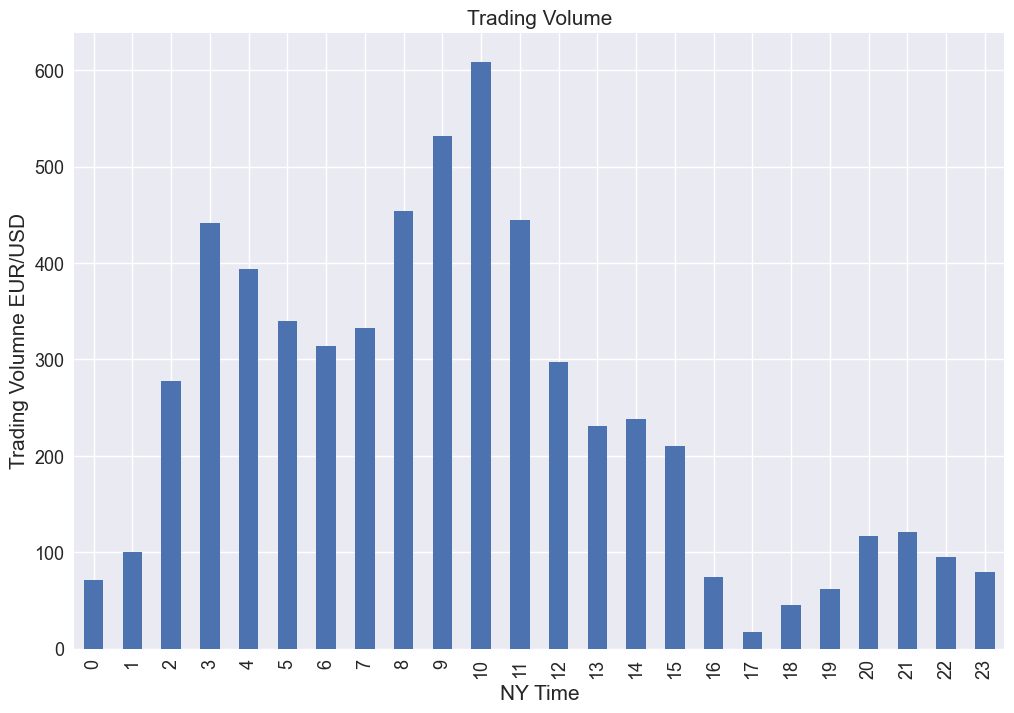

In [15]:
by_hour.volume.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Trading Volumne EUR/USD", fontsize = 15)
plt.title("Trading Volume", fontsize = 15)
plt.show()

# We can see clearly that we have pick in the trading volumne
# between 8:00 - 11:00 (in new york time)

# We can see at 17:00 that there is almost 0 volumne.
# that's because that the market close in this time. 

__Plot the spread price__

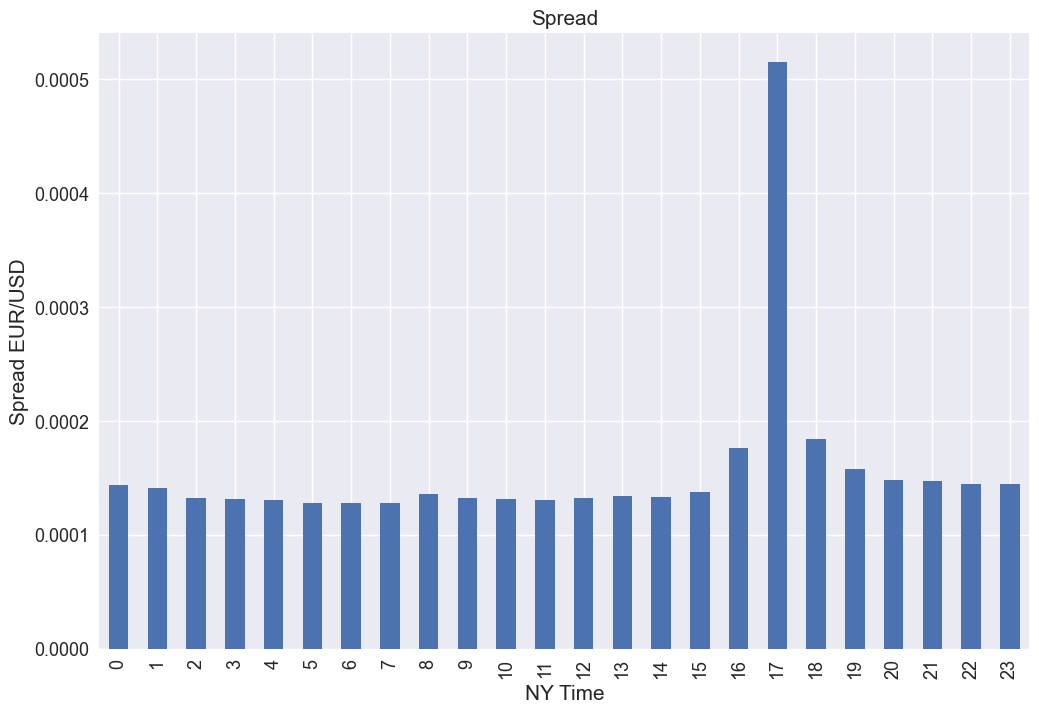

In [16]:
by_hour.spread.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Spread EUR/USD", fontsize = 15)
plt.title("Spread", fontsize = 15)
plt.show()

__Plot the spread from hour 0 to hour 16__

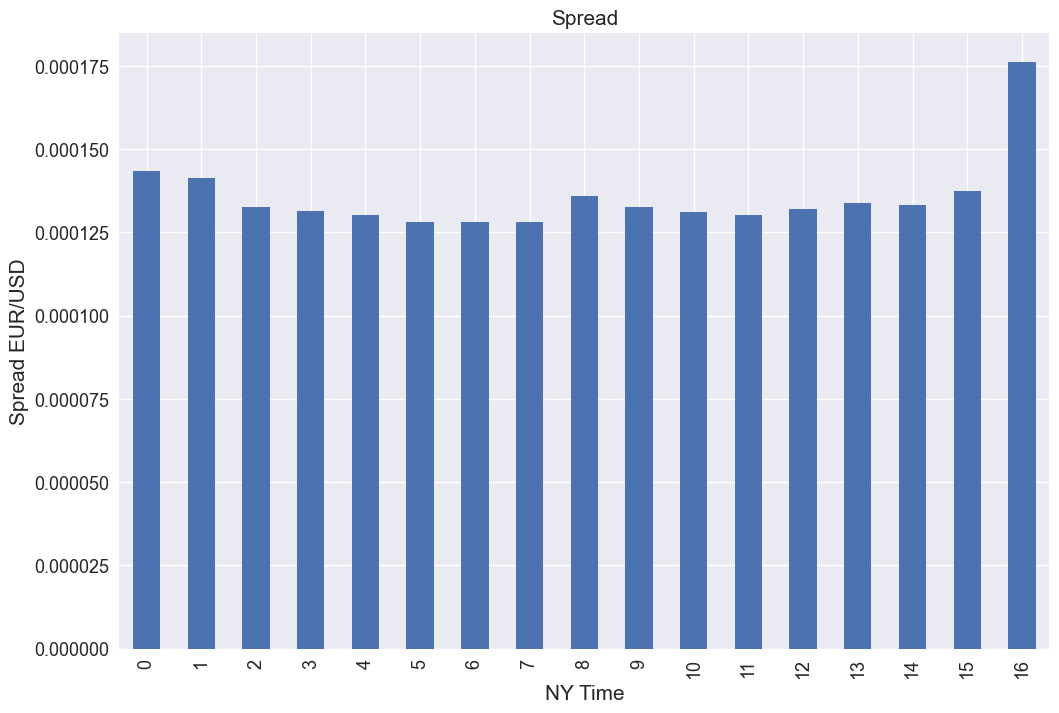

In [17]:
by_hour.loc[0:16, "spread"].plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Spread EUR/USD", fontsize = 15)
plt.title("Spread", fontsize = 15)
plt.show()

__Plot the absulute price change__

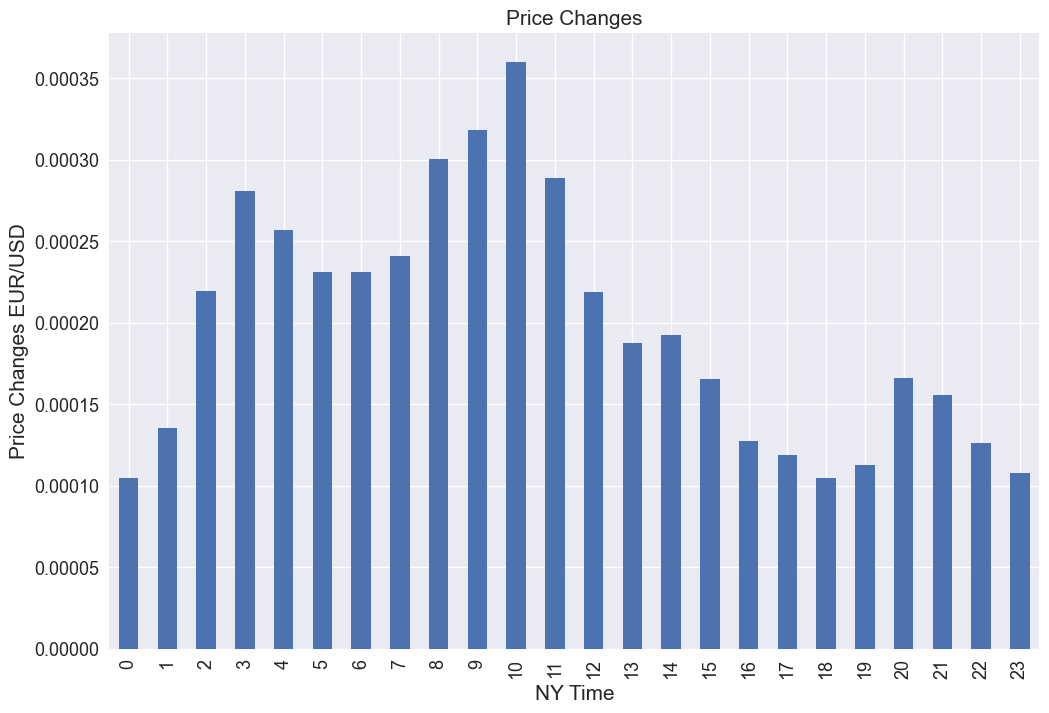

In [18]:
by_hour.price_change_abs.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Price Changes EUR/USD", fontsize = 15)
plt.title("Price Changes", fontsize = 15)
plt.show()

# We can see that we have higer absulute price change in 3:00-11:00.
# this is the busy trading hours (the pick).
# this mean that the price volatility is higer. 

---

# The best time to trade (Part 2)
- From traders prespective, the most importent question is: **is price changes  large enough to cover trading costs?**

In [19]:
df.head()

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs
time,,,,,,,,
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185
2019-07-21 21:25:00+00:00,1,1.12201,1.12161,0.00040,1.121810,2019-07-21 17:25:00-04:00,17,0.000030


Check **cover cost**. <br>
- If the `absulute price change` (e.g, the different price between day1 and day2) **bigger** than the `spread price`, its mean that we can cover the costs!
    - The price change in a bar should cover two trades, that each triggering helf spread costs. so its leading to total cost of a spread. 

__So, where the price change bigger that spread cost - its mean we should cover the costs!__

> This approach can be a simple way to assess whether the potential price change is sufficient to compensate for the cost of **entering** (helf spread costs) and **exiting** (helf spread costs) a trade due to the spread.

In [20]:
 df["cover_cost"] = df.price_change_abs > df.spread

In [24]:
df.head()

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs,cover_cost
time,,,,,,,,,
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220,False
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025,False
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015,False
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185,False
2019-07-21 21:25:00+00:00,1,1.12201,1.12161,0.00040,1.121810,2019-07-21 17:25:00-04:00,17,0.000030,False


__Now, lets see which hour can in avarage, cover the trading cost!__

In [22]:
df.groupby("hour").cover_cost.mean()

# Iterpretation:
# hour 0     0.239371 => only 23% from the bars cover on the trading costs.
# and so on...  

hour
0     0.239371
1     0.340786
2     0.563221
3     0.662051
4     0.635128
5     0.598872
6     0.619390
7     0.610000
8     0.652051
9     0.685385
10    0.735641
11    0.672051
12    0.570806
13    0.481016
14    0.470588
15    0.411220
16    0.260041
17    0.025450
18    0.147494
19    0.217995
20    0.389246
21    0.365340
22    0.299152
23    0.233960
Name: cover_cost, dtype: float64

As you can see for example, between the time: 03:00-11:00, most of the bars covering the trading cost.. that its greate!

> E.g: in time **11:00**, ~75% from the bars are **cover the trading cost!**  

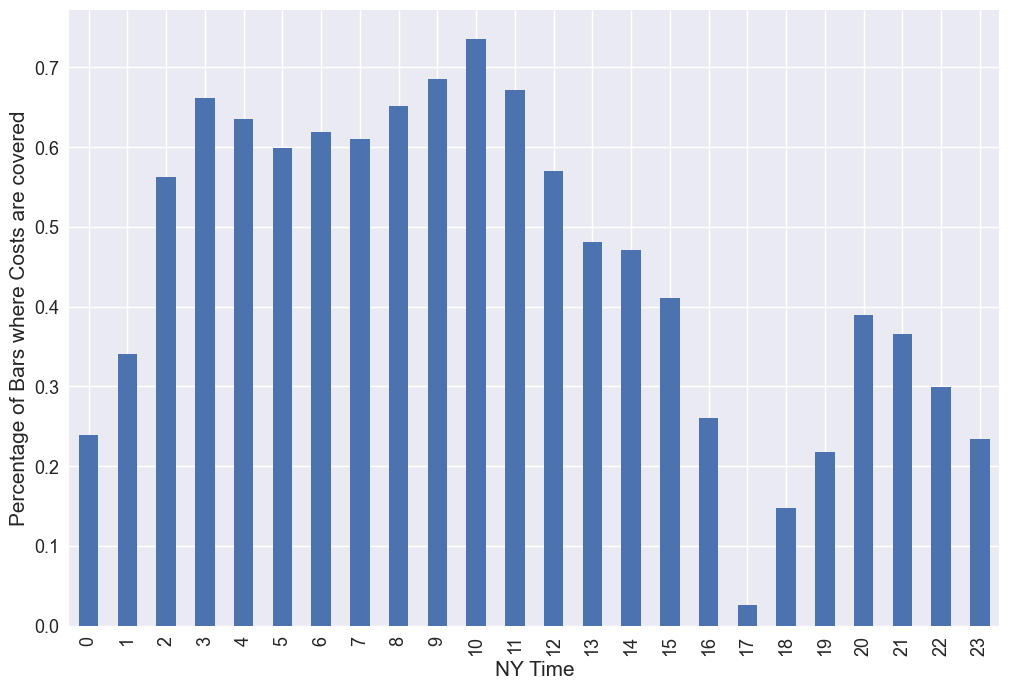

In [23]:
df.groupby("hour").cover_cost.mean().plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Percentage of Bars where Costs are covered", fontsize = 15)
plt.show()

Busy Trading Hours for __EUR/USD__: from __2:00 am__ to __12:59 pm__ New York Time

---

# Proportional Trading Costs and Trading Hours

In [25]:
ptc = 0.00007

In [26]:
ptc

7e-05

In [31]:
df.head()

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs,cover_cost
time,,,,,,,,,
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220,False
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025,False
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015,False
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185,False
2019-07-21 21:25:00+00:00,1,1.12201,1.12161,0.00040,1.121810,2019-07-21 17:25:00-04:00,17,0.000030,False


In [28]:

df.spread.mean()

0.00015465190281654777

In [32]:
# In assumtion that we want to trade in hours `hour.between(2, 12)` (the busy trades),
# what is the minimus spread?
# in other words, what is the avarage trading cost
spread = df.loc[df.hour.between(2, 12), "spread"].mean()
spread

0.00013103112250839954

In [30]:
# And what is the trade cost for each trade? 
# Calculate the proportional trading cost per trade!

# spread/2 -> helf spread cost (cost for one position)
# df.mid.mean() -> the "mid" refers to the midpoint or middle 
#                  point between the bid and ask prices of a currency pair
ptc = (spread/2) / df.mid.mean()
ptc

# 5.8454351829187725e-05 -> cost per trade.

5.8454351829187725e-05

So in a nutshell, when trading only during the busy trading hours, we have two positive effects:
1. **The volatility of price is higer**: its mean that we can trad and cover the trading costs 
2. the spreads and the proportion of trading costs are lower. 

> So, this increases the probability that we can cover trading costs in our tradese.

---

# The Impact of Granularity

Now, we are going to check which frequency (bar trades of `5min`,`10min`,`15min`,`20min`) have the best cover cost. 

so which hour for each frequency is the best for trade? (the higer probability of cover the trading costs)

In [40]:
def hours_granularity(freq = None):
    
    # load data
    df = pd.read_csv("../Control_And_Limit_Trading_Costs/Data/bid_ask.csv", 
                     parse_dates = ["time"],
                     index_col = "time",
                     usecols = ["time", "spread", "mid"])
    
    # resample to the given frequency (5min/10min/etc..)
    if freq is not None:
        df = df.resample(freq).last().dropna() 
    
    # data manipulation 
    df["NYTime"] = df.index.tz_convert("America/New_York") # change time zone
    df["hour"] = df.NYTime.dt.hour # add hour column ([1,2,..,24])
    df["price_change_abs"] = df.mid.diff().abs() # compute the abs change pricr (specify on the volatility)
    df["cover_cost"] = df.price_change_abs > df.spread # check if a bar can cover the trading costs
    
    # group hourly the the proportion of trading cost (bollian).
    # e.g: in hour 4 we have in avarage 87% that the bars can cover the trading costs
    df.dropna().groupby("hour").cover_cost.mean().plot(kind = "bar", figsize = (12, 8), fontsize = 13)
    
    # Plot 
    plt.xlabel("NY Time", fontsize = 15)
    plt.ylabel("Cover Costs", fontsize = 15)
    plt.title("Granularity: {}".format(freq), fontsize = 18)
    plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
    plt.show()

Now, lets check different frequencies for see two importent thinks:
1. Which frequency reffering the best probability of cover the trading costs?
2. In which hour we have the best probability of cover the trading costs?

> Pattern: 1. where the frequency lower, the probability of cover the trading cost bigger. 2. in the busy trading hours (the pick), the probability of cover the trading cost if bigger. 

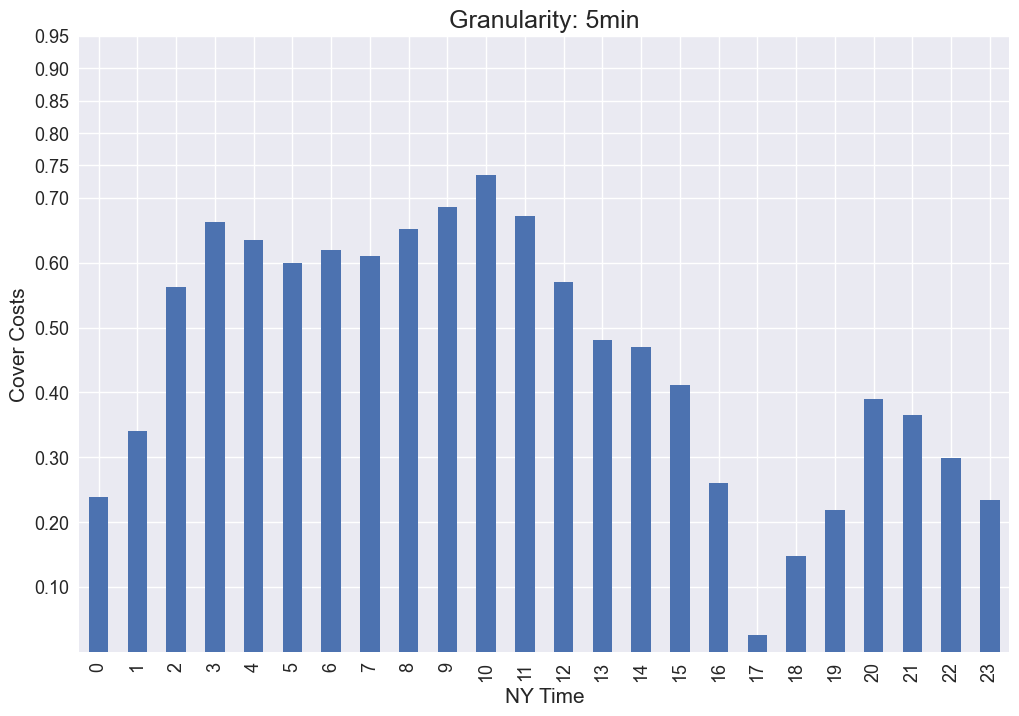

In [41]:
hours_granularity(freq = "5min")

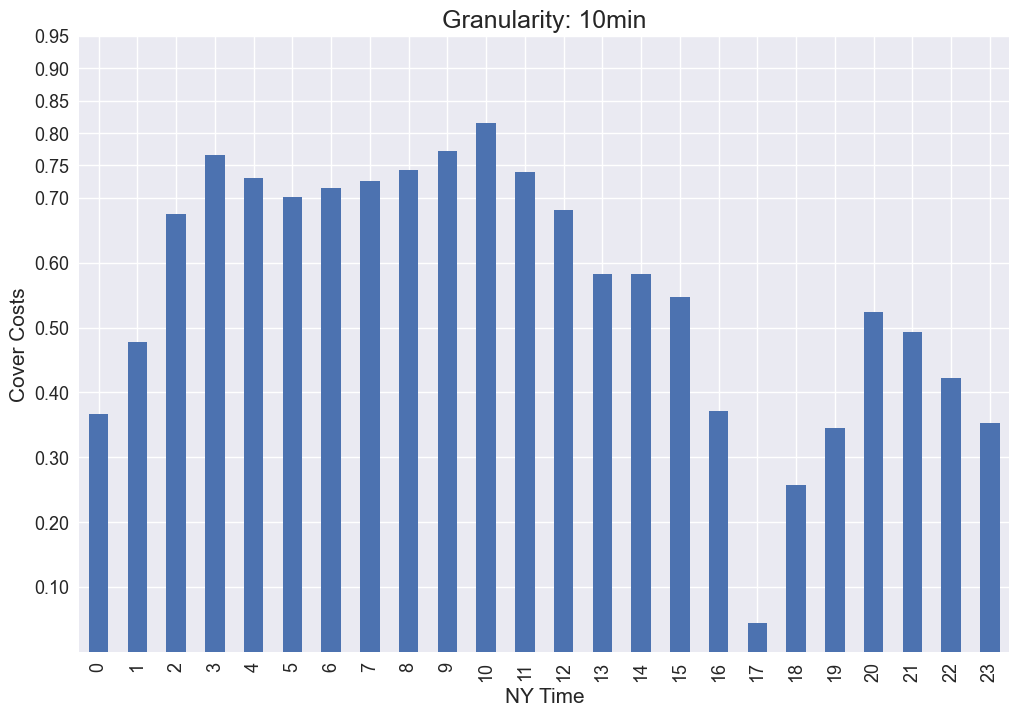

In [42]:
hours_granularity(freq = "10min")

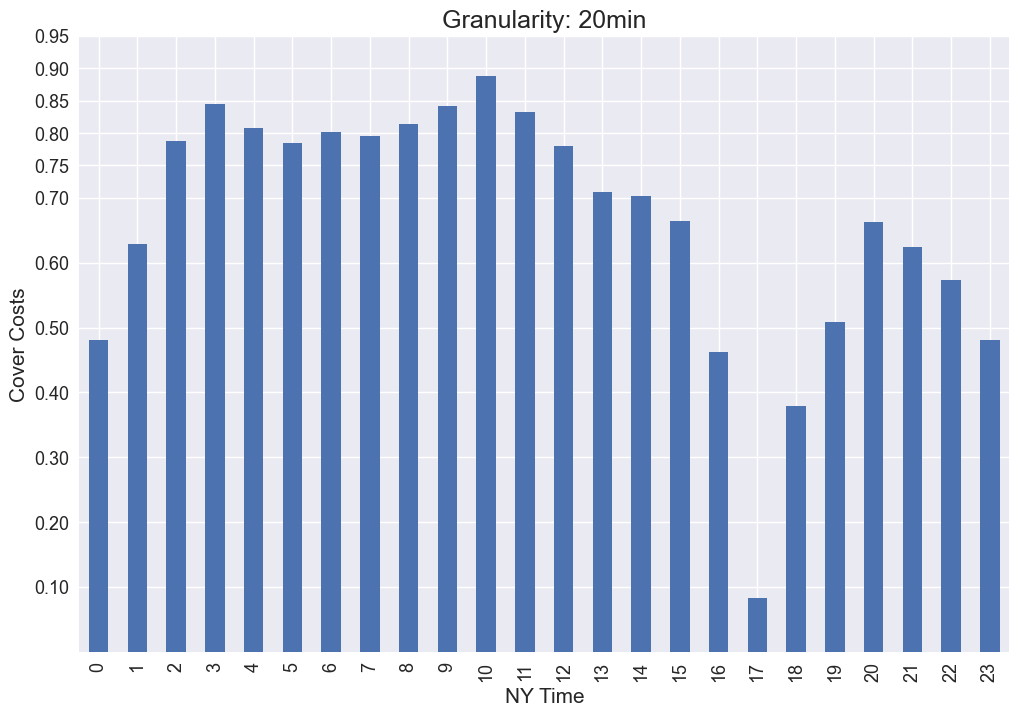

In [43]:
hours_granularity(freq = "20min")

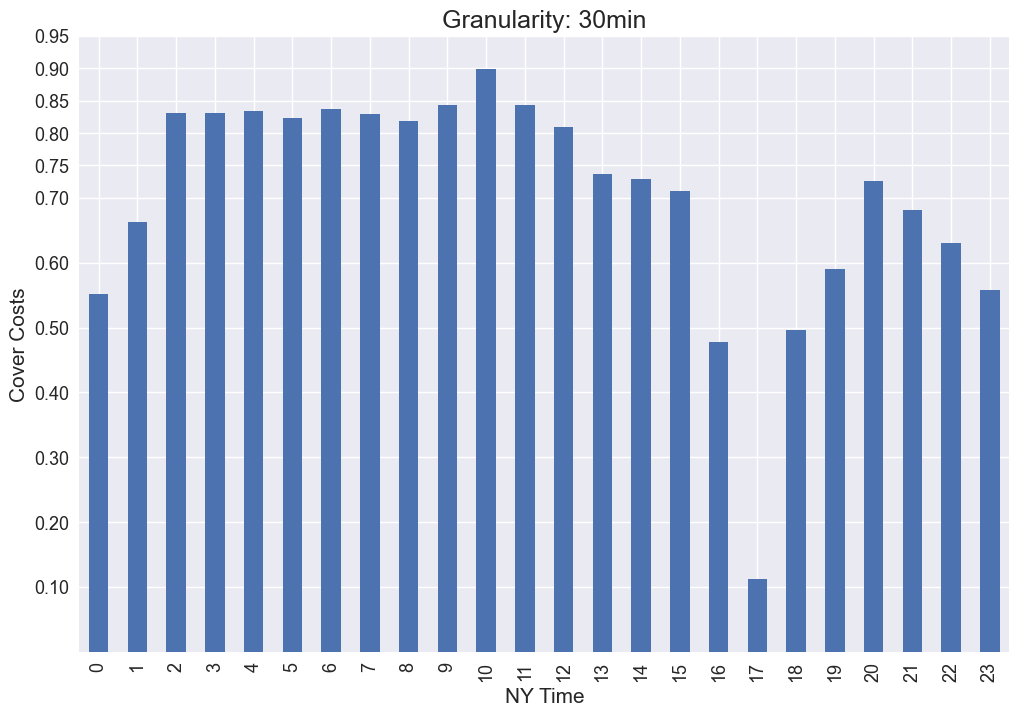

In [44]:
hours_granularity(freq = "30min")

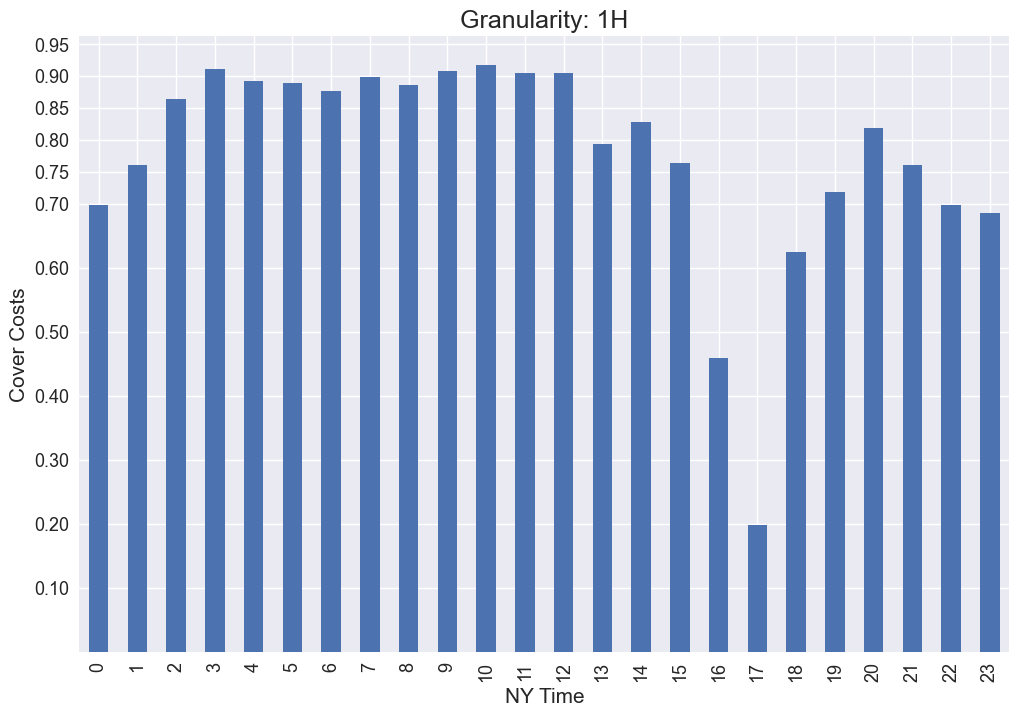

In [45]:
hours_granularity(freq = "1H")

---

# Conclusion

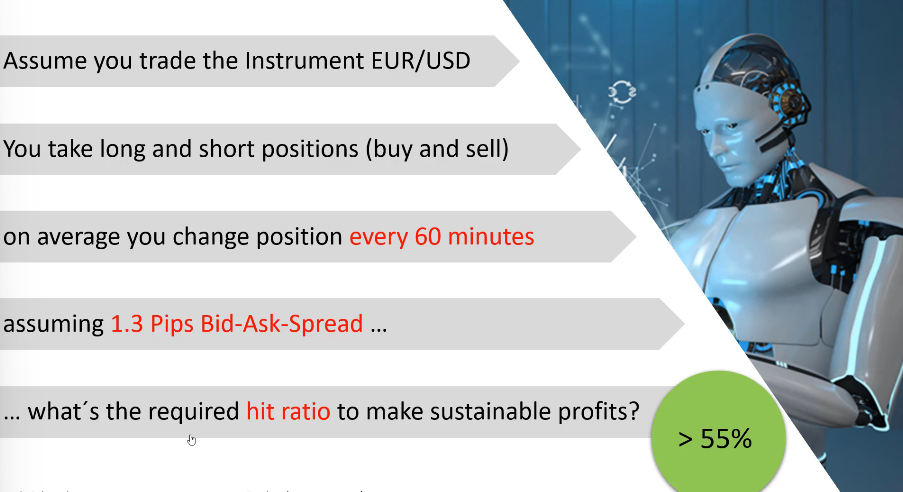